downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text1.jpg


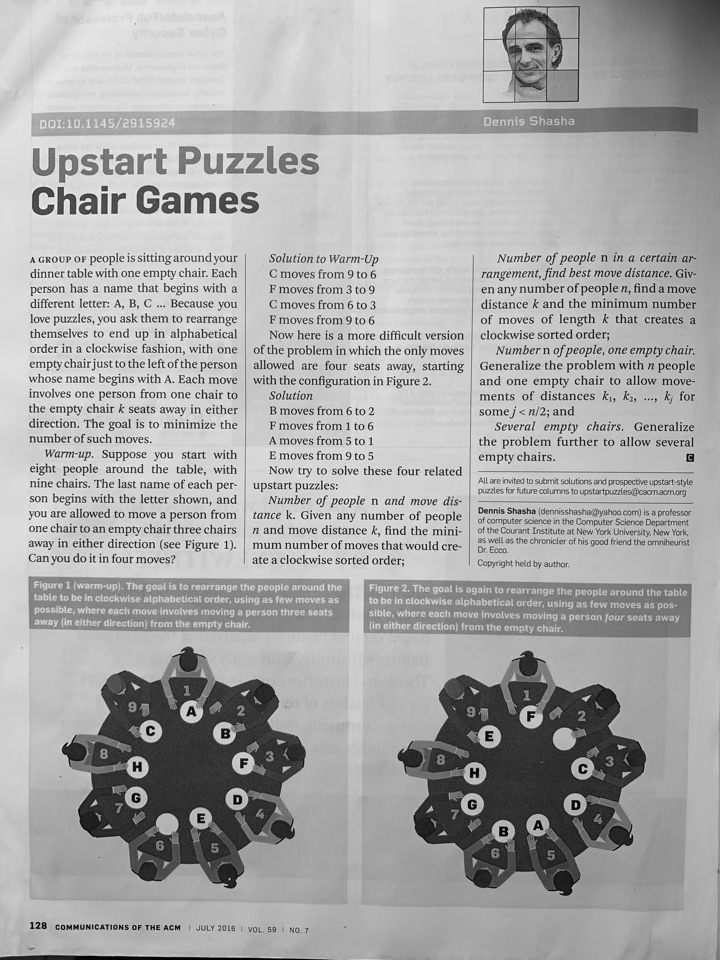

In [0]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text1.jpg"
img = url_to_image(url)
grayscaled = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2_imshow(grayscaled)

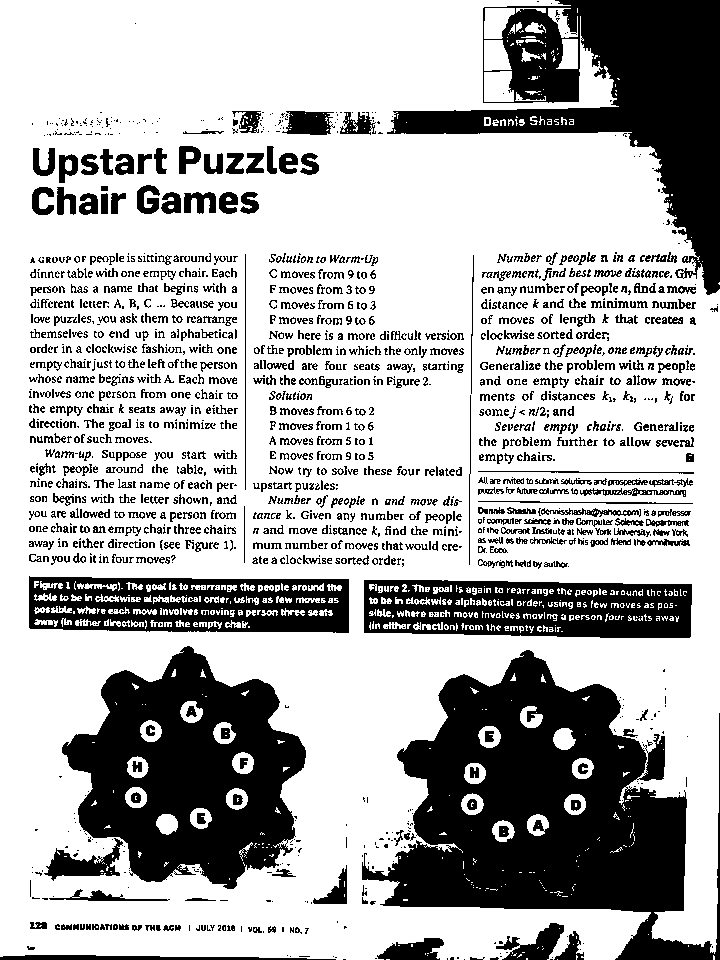

In [0]:
retval, threshold = cv2.threshold(grayscaled, 160, 255, cv2.THRESH_BINARY)
cv2_imshow(threshold)

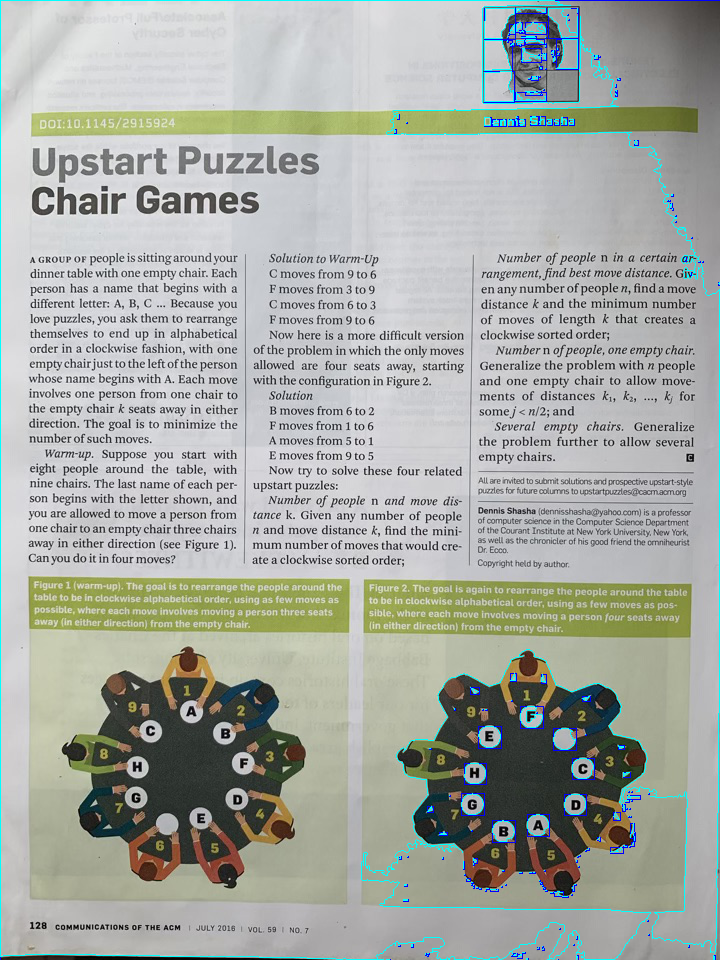

In [0]:
image, contours, hier = cv2.findContours(threshold, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a white rectangle to visualize the bounding rect
    cv2.rectangle(img, (x, y), (x + w, y + h), 255, 1)

cv2_imshow(cv2.drawContours(img, contours, -1, (255, 255, 0), 1))

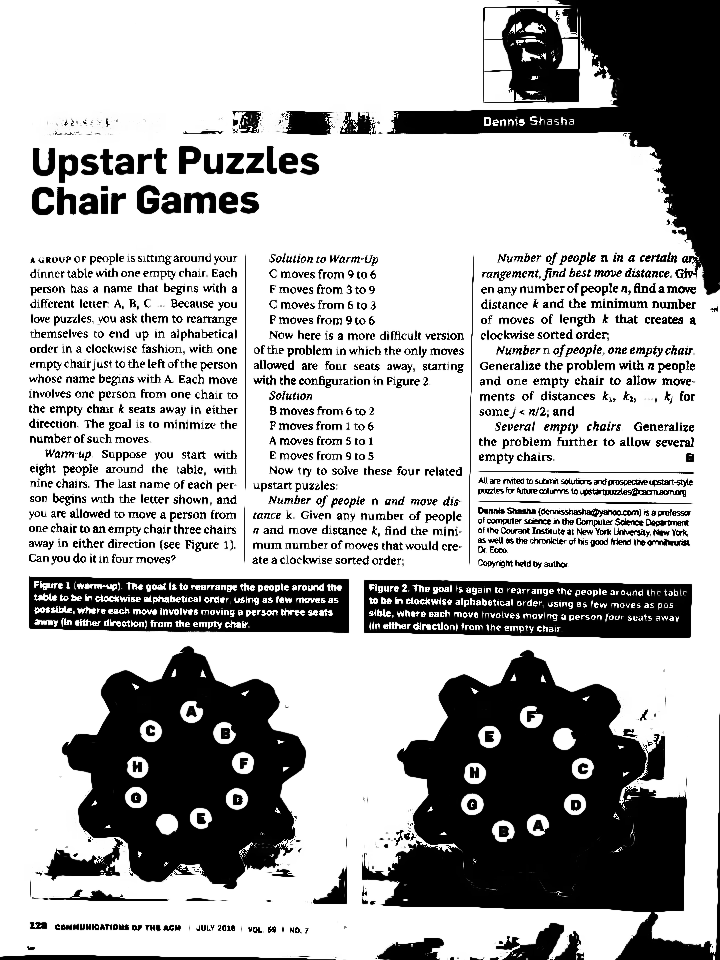

In [0]:
denoised = cv2.fastNlMeansDenoising(threshold,None,53,5,17)
cv2_imshow(denoised)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text4.jpg


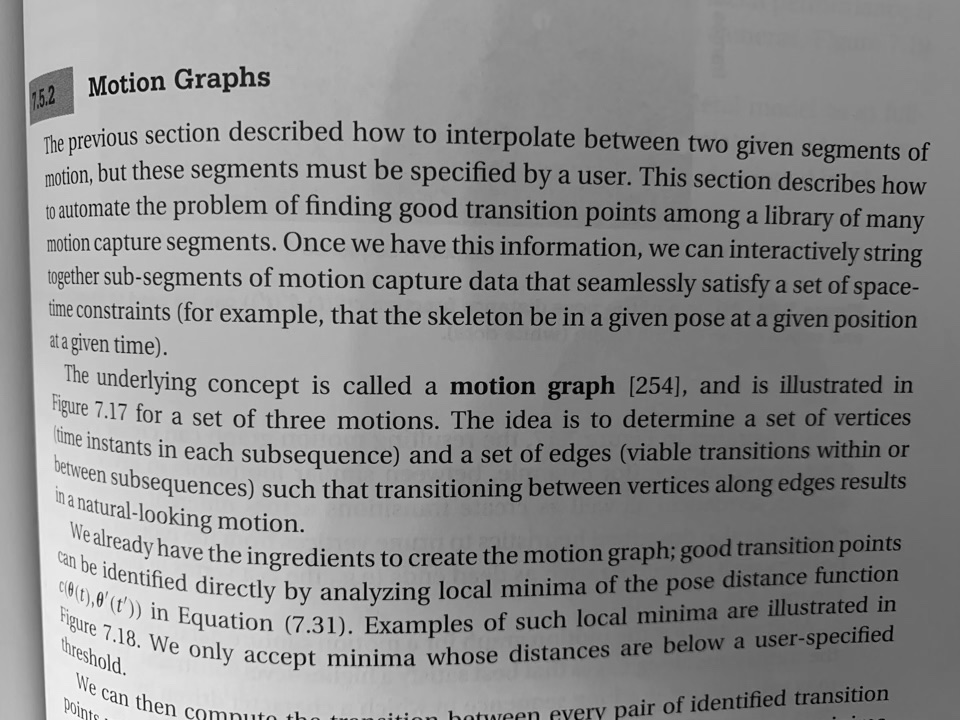

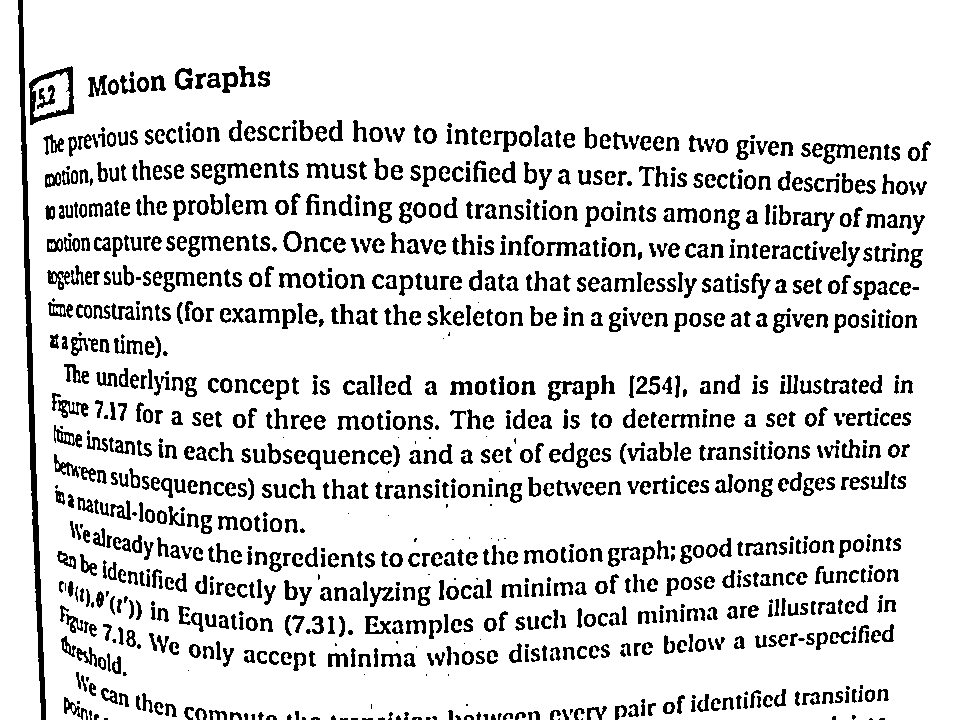

In [0]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text4.jpg"
img2 = url_to_image(url)

grayscaled = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
cv2_imshow(grayscaled)

blur = cv2.GaussianBlur(grayscaled, (5,5), 1)
# retval, threshold = cv2.threshold(grayscaled, 120, 255, cv2.THRESH_BINARY)
threshold = cv2.adaptiveThreshold(blur, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 17, 5)
cv2_imshow(threshold)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text5.jpg


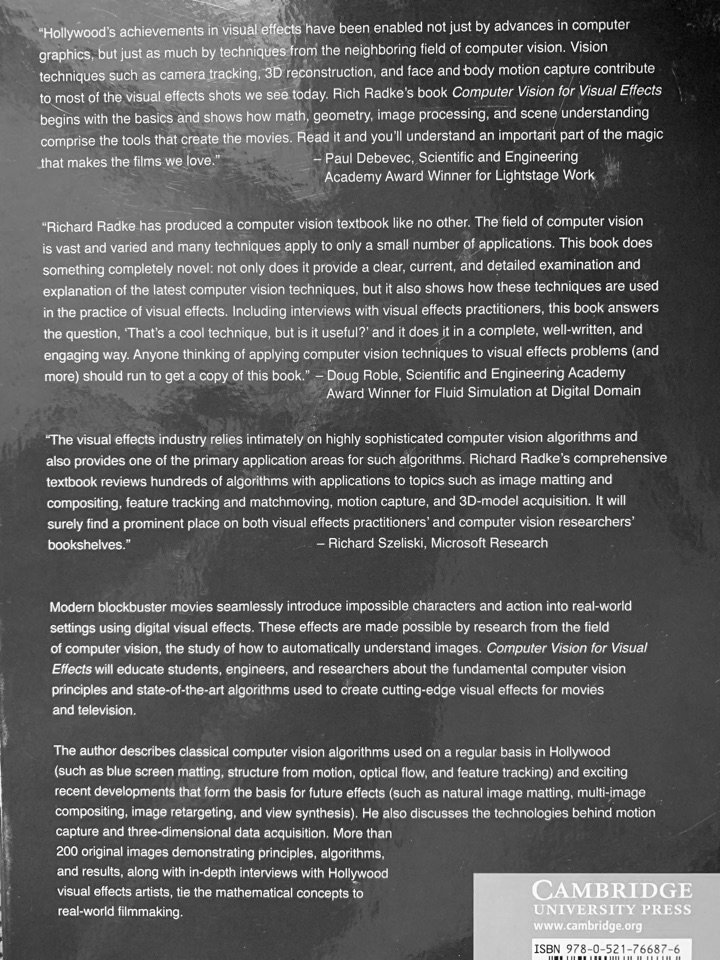

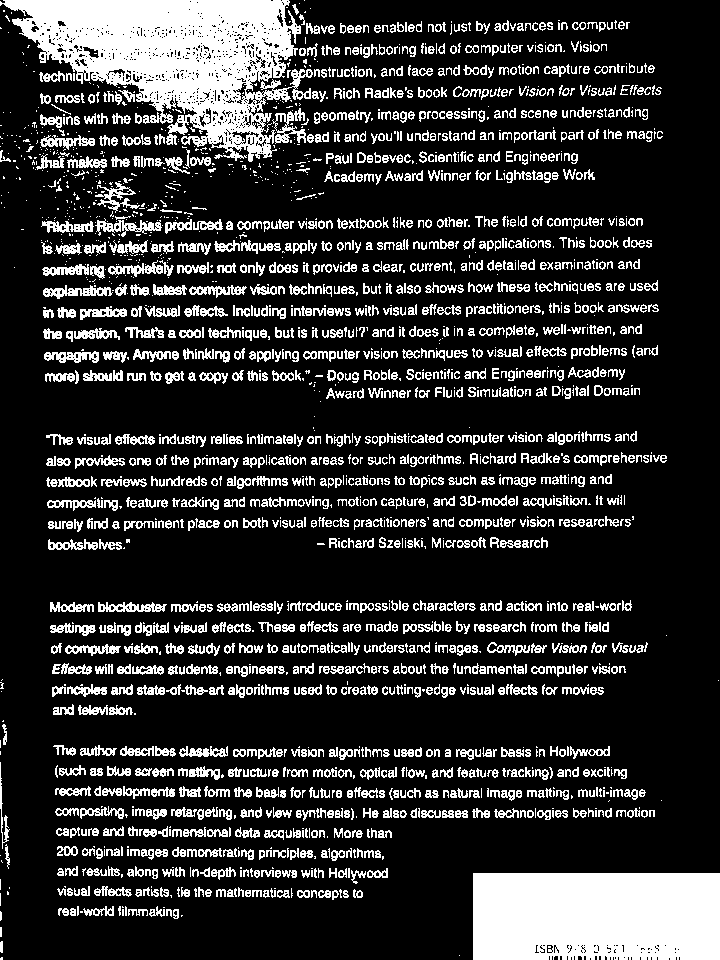

In [0]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text5.jpg"
img2 = url_to_image(url)

grayscaled = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
cv2_imshow(grayscaled)

# blur = cv2.GaussianBlur(grayscaled, (5,5), 1)
retval, threshold = cv2.threshold(grayscaled, 120, 255, cv2.THRESH_BINARY)
# threshold = cv2.adaptiveThreshold(grayscaled, 255,
#                           cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                           cv2.THRESH_BINARY, 17, 5)
cv2_imshow(threshold)

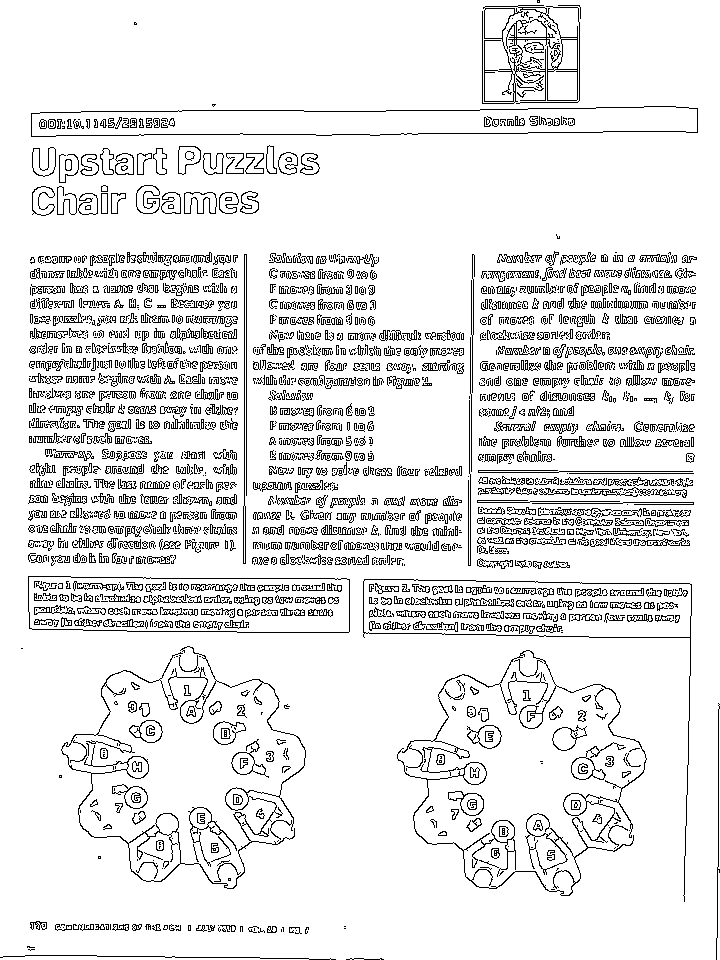

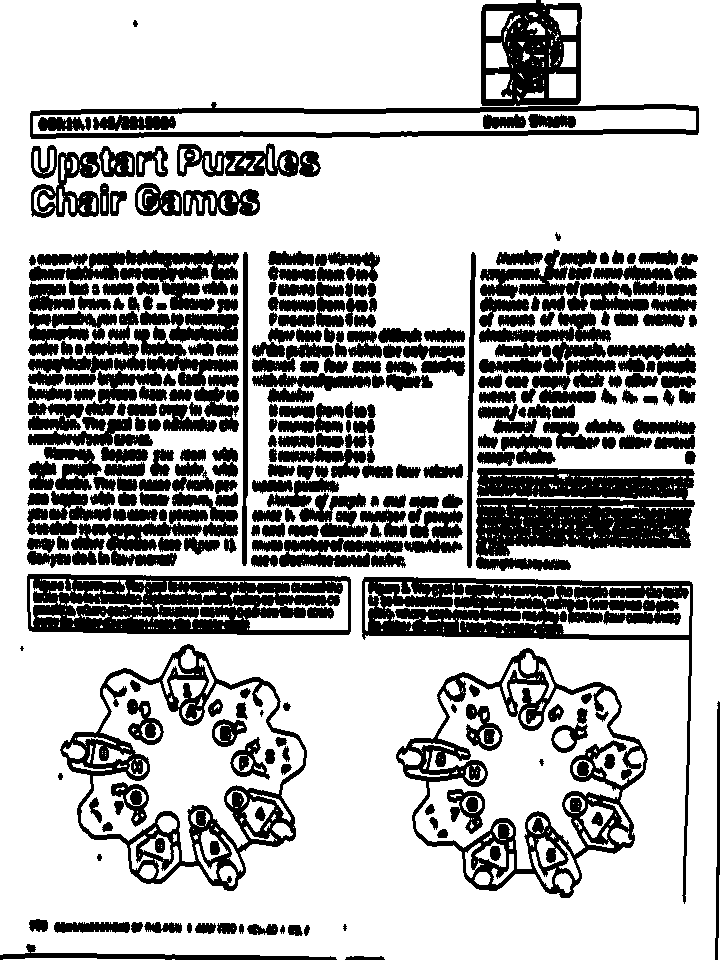

In [0]:
edges = 255 - cv2.Canny(grayscaled,50,150,apertureSize = 3)
cv2_imshow(edges)
edges

# kernel = np.array([[0,1,0],
#                    [1,1,1],
#                    [0,1,0]], np.uint8)

kernel = np.array([[0,0,1,0,0],
                   [0,0,1,0,0],
                   [0,1,1,1,0],
                   [0,0,1,0,0],
                   [0,0,1,0,0]], np.uint8)

image1 = cv2.erode(edges, kernel, iterations=1)
# image2 = cv2.dilate(image1, kernel, iterations=1)
cv2_imshow(image1)

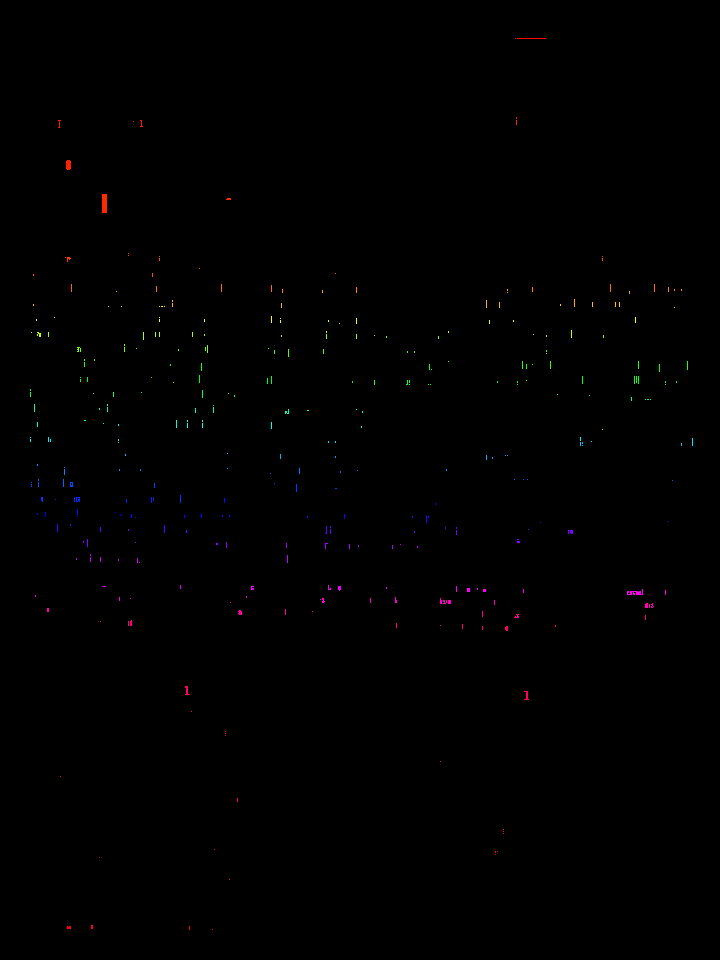

In [0]:
ret, img = cv2.threshold(edges, 45, 255, cv2.THRESH_BINARY)
ret, labels = cv2.connectedComponents(img)
# Map component labels to hue val
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
# set bg label to black
labeled_img[label_hue==0] = 0
# labeled_img[label_hue!=0] = 255

cv2_imshow(labeled_img)

In [0]:
data = np.argwhere(threshold==0)
data

array([[  0, 555],
       [  0, 556],
       [  0, 557],
       ...,
       [959, 717],
       [959, 718],
       [959, 719]])

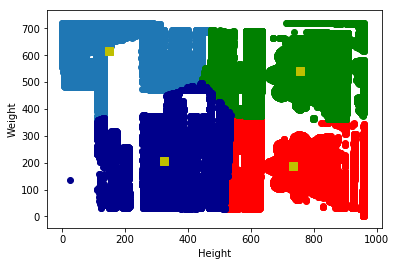

In [0]:
# convert to np.float32
Z = np.float32(data)

# define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(Z,4,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]
C = Z[label.ravel()==2]
D = Z[label.ravel()==3]

# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(C[:,0],C[:,1],c = 'g')
plt.scatter(D[:,0],D[:,1],c = 'darkblue')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

